In [1]:
# PYTHON 3.10.12

from IPython.display import Image #IPython
import cv2 # 4.8.0
import numpy as np # 1.23.5
import pandas as pd # 1.5.3
import matplotlib.pyplot as plt # 3.7.1
import seaborn as sns # 0.12.2
from scipy.cluster.hierarchy import dendrogram, linkage # 1.11.3

In [2]:
from processing_funcs import image_paths
import os

# base level of project
base_dir = os.path.dirname(os.getcwd())

# data directory
data_dir = os.path.join(base_dir, 'data')

# nightly image dir
nightly_image_path = os.path.join(data_dir, 'NightlyImagesforData2023')

# make sure these match folder names!
dates_of_interest = ['7_07', '7_08']

# if you don't provide folder names, default behaviour is run on all images
image_paths_list, folder_names = image_paths(path=nightly_image_path, folder_names=dates_of_interest)
# image_paths_list, folder_names = image_paths(path=nightly_image_path)

In [3]:
from processing_funcs import image_process, image_data
import shutil

# a list of all of our column names
column_names = [
        'id', 'box_SA', 'cont_SA', 'B_avg', 'G_avg', 'R_avg', 'B_dom', 'G_dom',
        'R_dom', 'B_cont_mean', 'G_cont_mean', 'R_cont_mean', 'H_cont_mean',
        'S_cont_mean', 'V_cont_mean', 'H_diff_180', 'h_0.0', 'h_21.2', 'h_42.4',
        'h_63.5', 'h_84.7', 'h_105.9', 'h_127.1', 'h_148.2', 'h_169.4',
        'h_190.6', 'h_211.8', 'h_232.9', 'h_254.1', 'h_275.3', 'h_296.5',
        'h_317.6', 'h_338.8']
# initialize empty data frame
df = pd.DataFrame(None, columns=column_names)

# iterate over all image paths and folder names
for image_path, folder_name in zip(image_paths_list, folder_names):
    
    # read in image from path
    original_image = cv2.imread(image_path)
    # prep new path for sub
    sub_image_dir = os.path.join(os.path.dirname(image_path), 'sub_images')
    # if sub image dir already exist, remove it
    if os.path.isdir(sub_image_dir):
        shutil.rmtree(sub_image_dir)
    # make sub image directory
    os.makedirs(sub_image_dir)
     # change directory to image path
    os.chdir(sub_image_dir)
    # crop image and get not mask (see processing_funcs.py for details)
    cropped_img, cropped_notmask = image_process(original_image, imshow=False)
    # identify moths/large contours and get data on them (see processing_funcs.py)
    df_i = image_data(cropped_img, cropped_notmask, folder_name, verbose=False)
    # combine data from this image with rest of the data
    df = pd.concat([df,df_i], axis=0).reset_index(drop=True)

# display first few rows of data to check it
df.head()
    

,id,box_SA,cont_SA,B_avg,G_avg,R_avg,B_dom,G_dom,R_dom,B_cont_mean,...,h_169.4,h_190.6,h_211.8,h_232.9,h_254.1,h_275.3,h_296.5,h_317.6,h_338.8,notes
0,7_08_46,7979,4339.5,116.756611,111.516105,133.050006,94.944336,119.832603,139.501801,87.567056,...,0.0,0.0,0.000000,0.127084,0.102895,0.070184,0.026319,0.050132,0.199273,
1,7_08_1927,5022,3330.0,119.262246,114.797093,134.205496,199.315979,148.777298,159.158356,88.104088,...,0.0,0.0,0.000000,0.190562,0.102350,0.029669,0.025090,0.028674,0.066507,
2,7_08_2570,6674,3333.5,134.430626,126.833084,146.035511,209.000000,158.380798,167.121277,87.435470,...,0.0,0.0,0.000000,0.306862,0.055289,0.021426,0.016182,0.026521,0.052742,
3,7_08_1334,6992,3156.0,142.613415,132.633867,152.814931,210.551285,161.631134,171.527039,103.637264,...,0.0,0.0,0.000000,0.213244,0.107695,0.030320,0.026030,0.049914,0.161184,
4,7_08_1251,2736,1648.0,101.636696,106.653143,116.144006,89.743439,102.132164,112.644318,84.686628,...,0.0,0.0,0.000365,0.127924,0.045322,0.021199,0.012061,0.013889,0.023392,


In [4]:
# rows by columns
df.shape

(22, 34)

In [9]:
# path where the data frame is saved
df_path = os.path.join(data_dir, 'sample_output5.csv')
assert not os.path.isfile(df_path), 'File already exists'
df.to_csv(df_path, index=False) # save data frame as .csv file

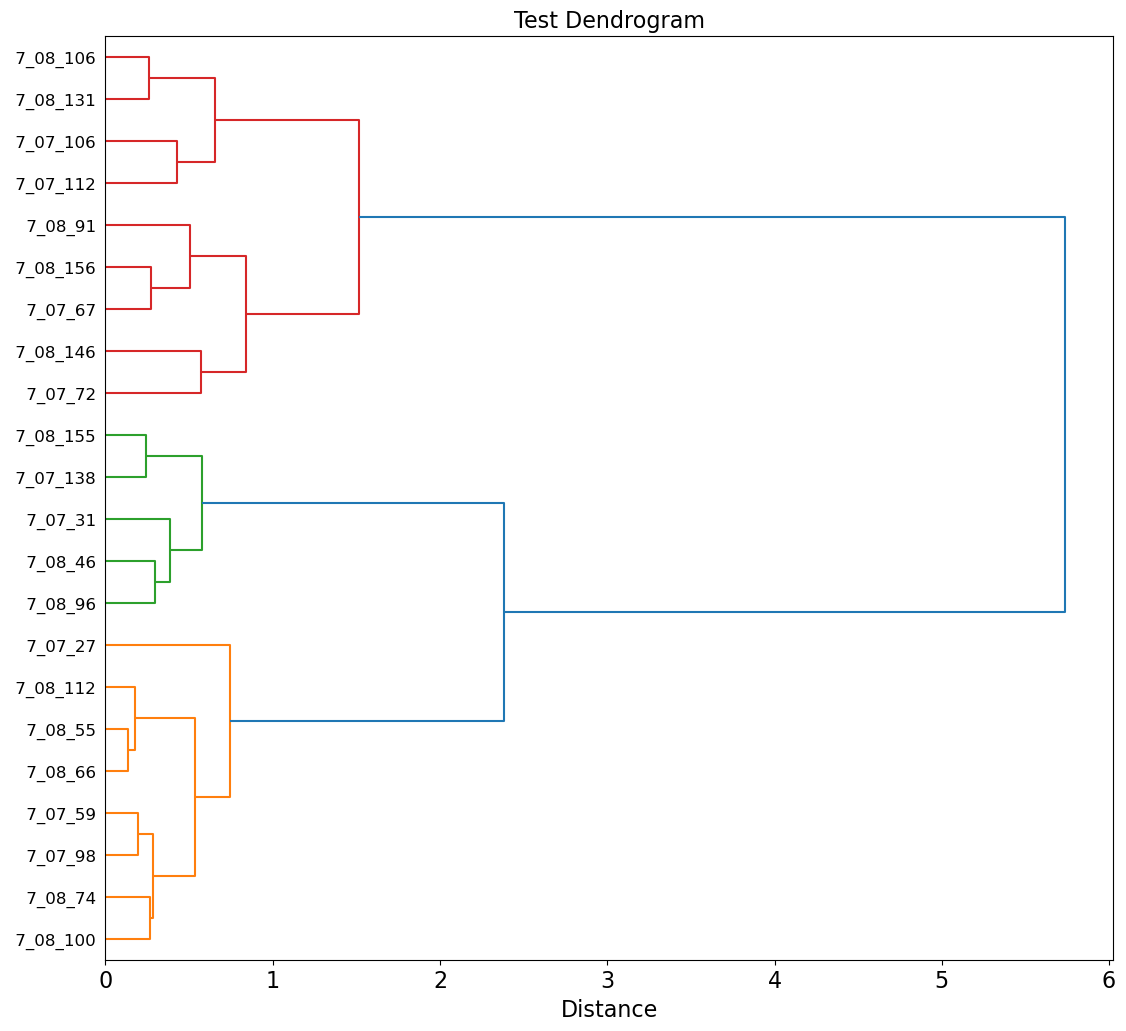

In [8]:
from processing_funcs import hierarchical_clustering

# read .csv file back into the environment
# make sure to modify the notes column for custom labels in the plot
# WARNING: IF YOU HAVE RE-RUN THE PIPELINE WITHOUT CHANGING ANYTHING,
# ANY NOTES YOU MAKE WILL BE OVERWRITTEN

df_read_path = os.path.join(data_dir, 'sample_output3.csv')
df_hc = pd.read_csv(df_read_path, na_filter=False) # added in a name to the notes column

# run hierarchical clustering (see processing_funcs.py)
hierarchical_clustering(
    df_hc, # data frame
    box_SA=False, # box surface area
    cont_SA=True, # contour surface area
    avg_cont_color=True, # average color data
    hue_band=True, # hue band data
    dend_title='Test Dendrogram', # chart title
    color_threshold=2, # distance threshold for color groups,
    fig_width=13, # units are inches
    fig_height=12,
    title_fontsize=16, # font size of title
    label_fontsize=12, # font size of labels
    x_font_size=16 # x tick label and axis label size
    )

In [19]:
# CHANGE THIS TO WHATEVER IT'S CALLED
# KEEP .CSV IN data FOLDER

df_read_path = os.path.join(data_dir, 'sample_output4.csv')
df_hc = pd.read_csv(df_read_path, na_filter=False) # added in a name to the notes column

forrest_labels_path = os.path.join(data_dir, 'forrest_groups_full.csv') 
forrest_labels = pd.read_csv(forrest_labels_path)

In [20]:
# combine standardized data with labeled groups
labeled_data = pd.merge(left=df_hc, right=forrest_labels, left_on='id', right_on='ID')


In [21]:
labeled_data.columns

Index(['id', 'box_SA', 'cont_SA', 'B_avg', 'G_avg', 'R_avg', 'B_dom', 'G_dom',
       'R_dom', 'B_cont_mean', 'G_cont_mean', 'R_cont_mean', 'H_cont_mean',
       'S_cont_mean', 'V_cont_mean', 'H_diff_180', 'h_0.0', 'h_21.2', 'h_42.4',
       'h_63.5', 'h_84.7', 'h_105.9', 'h_127.1', 'h_148.2', 'h_169.4',
       'h_190.6', 'h_211.8', 'h_232.9', 'h_254.1', 'h_275.3', 'h_296.5',
       'h_317.6', 'h_338.8', 'notes', 'ID', 'species', 'broadgroup',
       'broadgroup2'],
      dtype='object')

In [22]:
labeled_data

,id,box_SA,cont_SA,B_avg,G_avg,R_avg,B_dom,G_dom,R_dom,B_cont_mean,...,h_254.1,h_275.3,h_296.5,h_317.6,h_338.8,notes,ID,species,broadgroup,broadgroup2
0,6_12_20,7560,4912.0,25.047487,17.822487,21.769444,5.897530,3.030192,4.160659,9.760677,...,0.130291,0.067196,0.012831,0.035185,0.034788,,6_12_20,Clip,999,1000
1,6_12_27,2745,1356.5,146.478689,105.952641,125.253188,99.225540,99.591890,120.795944,101.122917,...,0.160291,0.049909,0.052459,0.056466,0.154463,,6_12_27,Macaria spp.,41,4
2,6_12_31,3300,1748.5,19.483030,29.542727,49.699091,12.288314,24.076426,43.441570,12.978723,...,0.038485,0.009091,0.010606,0.010909,0.018485,,6_12_31,Wood,983,1000
3,6_12_33,4543,2182.5,121.756989,108.238169,132.611270,96.796610,102.477290,126.887460,95.086104,...,0.069998,0.030597,0.027955,0.046005,0.083865,,6_12_33,Dryocampa rubicunda (cut1),15,2
4,6_12_40,5320,2539.0,126.987218,115.567293,140.298872,81.518320,103.288250,131.313030,87.552876,...,0.088534,0.026504,0.022368,0.018985,0.033647,,6_12_40,Dryocampa rubicunda (cut1),15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,7_03_195,7316,4166.0,122.847731,118.783625,140.643658,107.595024,120.179640,143.851580,95.370030,...,0.231411,0.033898,0.026654,0.050711,0.108393,,7_03_195,Dryocampa rubicunda,15,2
432,7_03_200,3135,2089.5,127.170335,121.646890,137.455502,92.217860,100.076195,118.192860,98.899539,...,0.259011,0.063477,0.035088,0.037640,0.062839,,7_03_200,Micro,991,9
433,7_03_211,3080,2005.5,68.343182,71.555844,75.019805,34.930355,47.462578,49.550938,35.115769,...,0.185714,0.052597,0.024351,0.013636,0.021753,,7_03_211,Pasiphila rectangulata,51,4
434,7_03_233,4350,2508.5,100.039080,99.621839,109.545977,168.637950,154.516850,162.591750,57.846508,...,0.233333,0.073563,0.028736,0.017011,0.030115,,7_03_233,Acronicta funeralis,1,1


In [45]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from processing_funcs import standardize

# sort by broad group
pca_data = labeled_data.sort_values(by='broadgroup')

# remove extraneous columns
x_data = pca_data.drop(columns=['id','box_SA','h_63.5', 'h_84.7', 'h_105.9', 'h_127.1', 'h_148.2', 'h_169.4', 'h_190.6',
                                'B_avg' ,'G_avg','R_avg', 'B_dom', 'G_dom',
                                'R_dom', 'H_diff_180','notes', 'ID', 'species', 'broadgroup', 'broadgroup2'])

# standardize the data by column
X = standardize(x_data)

# grab broad group ids
y = pca_data['broadgroup2']

# unique broadd group names
target_names = y.unique()

# run PCA - principle coordinates analysis
pca = PCA(n_components=2) # with two components
X_r = pca.fit(X).transform(X)

# run linear discriminants analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

explained variance ratio (first two components): [0.25761497 0.1795246 ]


Text(0.5, 1.0, 'PCA')

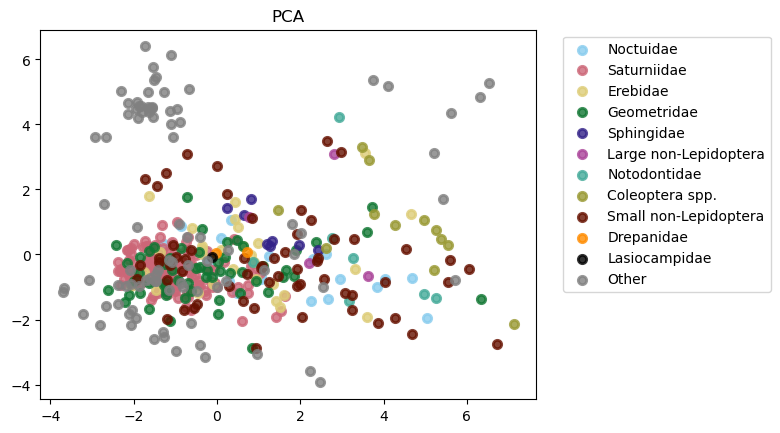

In [48]:
# Percentage of variance explained for each components
print(
    f"explained variance ratio (first two components): {pca.explained_variance_ratio_}"
)

colors = {
    1: {'id': 'Noctuidae',            'color':'#88CCEE'},
    2: {'id': 'Saturniidae',          'color':'#CC6677'},
    3: {'id': 'Erebidae',             'color':'#DDCC77'},
    4: {'id': 'Geometridae',          'color':'#117733'},
    5: {'id': 'Sphingidae',           'color':'#332288'},
    6: {'id': 'Large non-Lepidoptera','color':'#AA4499'},
    7: {'id': 'Notodontidae',         'color':'#44AA99'},
    8: {'id': 'Coleoptera spp.',      'color':'#999933'},
    9: {'id': 'Small non-Lepidoptera','color':'#661100'},
    10:{'id': 'Drepanidae',           'color':'#FF8C00'},
    11:{'id': 'Lasiocampidae',        'color':'black'},
    1000:{'id':'Other','color':'grey'}
}

plt.figure()

lw = 2

for i in target_names:
    label = colors.get(i)['id']
    color = colors.get(i)['color']
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1],alpha=0.8, color=color, lw=lw, label=label
    )
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", shadow=False, scatterpoints=1)
plt.title("PCA")

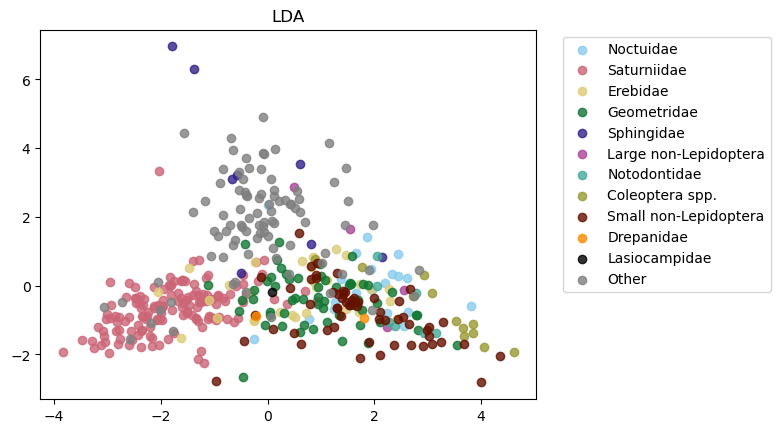

In [49]:
plt.figure()
for i in target_names:
    label = colors.get(i)['id']
    color = colors.get(i)['color']
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=label
    )
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", shadow=False, scatterpoints=1)
plt.title("LDA")

plt.show()